In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext rpy2.ipython

import ipyparallel as ipp
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import msprime
import numpy as np
import pandas as pd
import PIED
import toytree

from collections import Counter
from IPython.display import display, SVG

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

ipyclient = ipp.Client(cluster_id="cannabis")
print(len(ipyclient))

40


In [40]:
def _bm(mean, sigma, dt, log=True, dtype="int"):
    ret = 0
    mean = np.float(mean)
    if dtype in ["int", int]:
        # Avoid log(1)
        if not log or mean <= 1:
            ret = np.int(np.round(np.random.normal(mean, sigma*dt)))
        else:
            ret = np.int(np.round(np.exp(np.random.normal(np.log(mean), sigma*dt))))

    elif dtype in ["float", float]:
        ret = np.random.normal(mean, sigma*dt)
    else:
       raise Exception("bm dtype must be 'int' or 'float'. You put: {}".format(dtype))
    return ret

_bm(1, 0.1, 572494.7024659715, True, int)

9041

In [74]:
def log_scale_colors(vals, colors=True):
    vals = np.array([float(x) if x else 0 for x in vals])
    vals[np.where(vals > 0)] = vals[np.where(vals > 0)]/np.sum(vals[np.where(vals > 0)])
    #vals = [x for x in vals if x > 0]
    labc = np.log(vals + np.finfo(float).eps)
    labc = labc - labc.min()
    labc = (labc/labc.max())
    cmap = cm.get_cmap("jet")
    if colors:
        return [cmap(float(x)) for x in labc]
    else:
        return labc

tre = PIED.Core("wat")
tre, res = tre._simulate()
tips = tre.treenode.get_leaves()
labs = np.array([x.abundance for x in tips])

node_abund = tre.get_node_values("abundance")
sizes = [10 if i else 0 for i in node_abund]

tre.draw(tip_labels=[str(x) for x in labs],
         node_labels="abundance",
         #node_sizes=log_scale_colors(sizes, colors=False)*10,
         #node_sizes=sizes*node_colors,
         tip_labels_colors=np.log(labs),
         width=500,
         height=500)

labs = np.array([x.pi for x in tips])
tre.draw(tip_labels=[str(x)[:5] for x in labs],
         node_labels="abundance",
         #node_sizes=log_scale_colors(sizes, colors=False)*10,
         #node_sizes=list(np.round(sizes*node_colors).astype(int)),
         tip_labels_colors=labs,
         width=500,
         height=500)

labs = np.array([x.r for x in tips])
tre.draw(tip_labels=[str(x)[:5] for x in labs],
         node_labels="abundance",
         #node_sizes=log_scale_colors(sizes, colors=False)*10,
         #node_sizes=list(np.round(sizes*node_colors).astype(int)),
         tip_labels_colors=labs,
         width=500,
         height=500)

(<toyplot.canvas.Canvas at 0x7f6d0a957550>,
 <toytree.Render.ToytreeMark at 0x7f6d0a978390>)

<svg class="toyplot-canvas-Canvas" height="500.0px" id="tb1c3e210d14d4688903d6a838a5f888f" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 500.0 500.0" width="500.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 336 9 678 303 3096 722 187 425 15044 7779 883 428 14705 13092 1314 16597 28844 17907 1982 2536 341 268 68 11644 506 300 4 5 123 4 159 33 242 481 16982 4764 3258 4526

<svg class="toyplot-canvas-Canvas" height="500.0px" id="t4f02badc8f684f2ca45501e5b4c46b23" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 500.0 500.0" width="500.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 336 9 678 303 3096 722 187 425 15044 7779 883 428 14705 13092 1314 16597 28844 17907 0.046 0.082 0.007 0.009 0.001 0.359 0.040 0.019 0.0 0.000 0.003 0.001 0.006 0.001 0.015 0.003 0.760 0.276 0.146 0.308

<svg class="toyplot-canvas-Canvas" height="500.0px" id="tc48f67eaee0c47e7bac46f86ae5fb0be" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 500.0 500.0" width="500.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 336 9 678 303 3096 722 187 425 15044 7779 883 428 14705 13092 1314 16597 28844 17907 -0.00 -0.00 0.007 0.007 0.005 0.003 -0.00 -0.00 -0.01 -0.01 -0.00 -0.00 -0.01 -0.01 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00

In [321]:
import momi

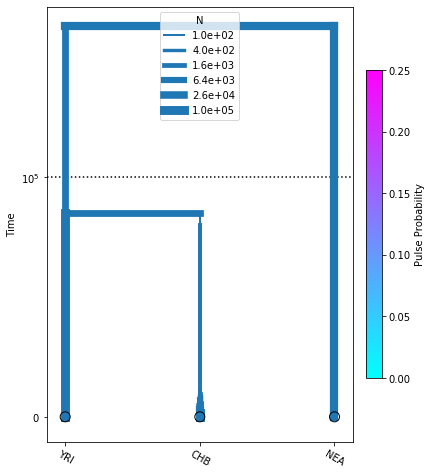

In [331]:
model = momi.DemographicModel(N_e=50000)
# add YRI leaf at t=0 with size N=1e5
model.add_leaf("YRI", N=1e5)
# add  CHB leaf at t=0, N=1e5, growing at rate 5e-4 per unit time (year)
model.add_leaf("CHB", N=1e5, g=5e-4)
# add NEA leaf at 50kya and default N
model.add_leaf("NEA")
# stop CHB growth at 10kya
model.set_size("CHB", g=0, t=1e4)

# at 80 kya CHB goes thru bottleneck
model.set_size("CHB", N=100, t=8e4)
# at 85 kya CHB joins onto YRI; YRI is set to size N=1.2e4
model.move_lineages("CHB", "YRI", t=8.5e4, N=1.2e4)

# at 500 kya YRI joins onto NEA
model.move_lineages("YRI", "NEA", t=5e5)
fig = momi.DemographyPlot(
    model, ["YRI", "CHB", "NEA"],
    figsize=(6,8),
    linthreshy=1e5, pulse_color_bounds=(0,.25))

In [81]:
params_df, dat_df = PIED.load_sims("/home/isaac/PIED/default_PIED/growthRateSigma0_5000-SIMOUT.csv")
params_df

,birth_rate,stop_criterion,ntaxa,time,process,ClaDS,abundance_mean,abundance_sigma,growth_rate_mean,growth_rate_sigma,ClaDS_sigma,ClaDS_alpha,sequence_length,mutation_rate,sample_size,obs_ntaxa,obs_time,turnover_rate
0,0.3,taxa,100,4.0,rate,True,50000,0.1,0.05,0.05,0.2,0.95,1000,1.000000e-09,5,100,24.473016,0.057143
1,0.3,taxa,100,4.0,rate,True,50000,0.1,0.05,0.05,0.2,0.95,1000,1.000000e-09,5,100,24.256839,0.396341
2,0.3,taxa,100,4.0,rate,True,50000,0.1,0.05,0.05,0.2,0.95,1000,1.000000e-09,5,100,19.463712,0.302817
3,0.3,taxa,100,4.0,rate,True,50000,0.1,0.05,0.05,0.2,0.95,1000,1.000000e-09,5,100,14.083423,0.250000
4,0.3,taxa,100,4.0,rate,True,50000,0.1,0.05,0.05,0.2,0.95,1000,1.000000e-09,5,100,16.533607,0.066038
5,0.3,taxa,100,4.0,rate,True,50000,0.1,0.05,0.05,0.2,0.95,1000,1.000000e-09,5,100,22.323992,0.602410
6,0.3,taxa,100,4.0,rate,True,50000,0.1,0.05,0.05,0.2,0.95,1000,1.000000e-09,5,100,17.252799,0.146552
7,0.3,taxa,100,4.0,rate,True,50000,0.1,0.05,0.05,0.2,0.95,1000,1.000000e-09,5,100,11.214680,0.214286
8,0.3,taxa,100,4.0,rate,True,50000,0.1,0.05,0.05,0.2,0.95,1000,1.000000e-09,5,100,15.160574,0.175000
9,0.3,taxa,100,4.0,rate,True,50000,0.1,0.05,0.05,0.2,0.95,1000,1.000000e-09,5,100,23.914796,0.543779


(array([ 47., 277., 484., 557., 476., 407., 292., 223., 165., 116.,  93.,
         61.,  50.,  37.,  29.,  36.,  26.,  18.,  15.,  18.,  16.,   7.,
          8.,   9.,   4.,   4.,   5.,   5.,   6.,   1.,   0.,   0.,   0.,
          3.,   1.,   1.,   1.,   0.,   1.,   1.]),
 array([0.03869239, 0.08564526, 0.13259813, 0.179551  , 0.22650387,
        0.27345674, 0.32040961, 0.36736248, 0.41431535, 0.46126822,
        0.50822109, 0.55517396, 0.60212683, 0.6490797 , 0.69603257,
        0.74298544, 0.78993831, 0.83689118, 0.88384405, 0.93079692,
        0.9777498 , 1.02470267, 1.07165554, 1.11860841, 1.16556128,
        1.21251415, 1.25946702, 1.30641989, 1.35337276, 1.40032563,
        1.4472785 , 1.49423137, 1.54118424, 1.58813711, 1.63508998,
        1.68204285, 1.72899572, 1.77594859, 1.82290146, 1.86985433,
        1.9168072 ]),
 <a list of 40 Patch objects>)

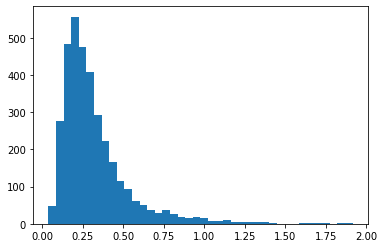

In [80]:
rs = []
for row in dat_df.iterrows():
    try:
        for i in row[1].values:
            rs.append(i["lambda_"])
    except:
        import pdb; pdb.set_trace()
plt.hist(rs, bins=40)

(0, 10)

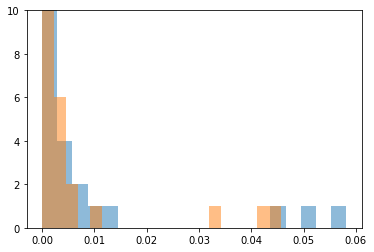

In [415]:
from PIED.PIED import nucleotide_diversity

tre = PIED.Core("wat")
tre.set_param("ntaxa", 100)
tre.set_param("process", "rate")
tre.set_param("abundance_sigma", 1)
tre.set_param("growth_rate_mean", 0)
tre.set_param("growth_rate_sigma", 5e-1)
tre.set_param("abundance_mean", 5e6)
tre.set_param("mutation_rate", 1e-8)
tre.set_param("sequence_length", 10000)
tre.set_param("sample_size", 10)
tree, res = tre._simulate()
tips = tree.treenode.get_leaves()
[x.pi for x in tips]
[x.abunds for x in tips]
pis = [nucleotide_diversity(tre.paramsdict, x) for x in tips]
hpis = [nucleotide_diversity(tre.paramsdict, x, harmonic=True) for x in tips]
plt.hist(pis, alpha=0.5, bins=20)
plt.hist(hpis, alpha=0.5, bins=20)
plt.ylim(0, 10)

# include the full model
#ts, tree = PIED.PIED.nucleotide_diversity_ILS(tre.paramsdict, tree)
#tips = tree.treenode.get_leaves()
#pis = [nucleotide_diversity(tre.paramsdict, x) for x in tips]
#plt.hist(pis, alpha=0.5, bins=20)

In [387]:
print([x.r for x in tips])
[x.abunds for x in tips]
tips[-5].abunds

[0.24439654696014443, 0.2791961948665399, 0.23392576597602865, 0.5677712895696445, 0.4550440850703892, 0.5869086707823731, 0.4544072981183209, 0.45455941830346547, 0.4343824884262668, 0.2873542185544459, 0.32223538995903683, 0.5046081045341053, 0.4699545851615012, 0.5336569480492317, 0.22124367998271208, 0.40315167386761847, 0.46218117286798605, 0.5046054363772917, 0.40550862026832435, 0.43553227256536675, -0.45249474450340194, -0.38214897676667214, -0.5722547313583994, -0.3609422841594015, -0.3189365998014663, -0.37936188478406885, -0.4651025564762323, -0.4673450936052118, -0.38968531450594623, -0.432163861752512, -0.41147564082637184, -0.41330756800912444, -0.4123813538236661, -0.4182341083489364, -0.42798079410370055, 0.10932893722561937, -0.039454482916445224, 0.07140850443144323, 0.14993307849638948, 0.09635797954645316, 0.11838156885109065, 0.10909366215338778, 0.06227051021942381, 0.07479340773181448, 0.16178119593242757, 0.34557913525846756, 0.3598168932599603, 0.28204593607054

[2648,
 2646,
 2639,
 2631,
 2596,
 2574,
 2570,
 2539,
 2534,
 2521,
 2520,
 2510,
 2506,
 2489,
 2485,
 2445,
 2433,
 2431,
 2382,
 2375,
 2370,
 2364,
 2346,
 2337,
 2331,
 2329,
 2322,
 2317,
 2302,
 2301,
 2294,
 2287,
 2284,
 2273,
 2260,
 2248,
 2247,
 2238,
 2236,
 2225,
 2208,
 2206,
 2190,
 2185,
 2154,
 2151,
 2148,
 2139,
 2134,
 2132,
 2100,
 2098,
 2089,
 2071,
 2068,
 2046,
 2043,
 2033,
 2020,
 2006,
 1998,
 1997,
 1995,
 1990,
 1987,
 1986,
 1983]

In [49]:
tree = PIED.Core("mammals_test2")
tree.set_param("ntaxa", 100)
tree.set_param("birth_rate", 0.0429)
tree.set_param("process", "abundance")
tree.set_param("abundance_mean", 5e5)
tree.set_param("abundance_sigma", 0.5)
tree.set_param("growth_rate_mean", 5e-3)
tree.set_param("growth_rate_sigma", 5e-3)
tree.set_param("ClaDS", "True")
tree.set_param("ClaDS_sigma", 0.174)
tree.set_param("ClaDS_alpha", 0.988)
tree.set_param("sequence_length", 1000)
tree.set_param("mutation_rate", 1e-8)
tree.set_param("sample_size", 5)
_ = tree.get_params(verbose=True)

------- PIED params file (v.0.0.5)----------------------------------------------
mammals_test2        ## [0] [simulation_name]: The name of this simulation scenario
./default_PIED       ## [1] [project_dir]: Where to save files
0.0429               ## [2] [birth_rate]: Speciation rate
taxa                 ## [3] [stop_criterion]: Whether to stop on ntaxa or time
100                  ## [4] [ntaxa]: Number of taxa to simulate if stop is `ntaxa`
4                    ## [5] [time]: Amount of time to simulate if stop is `time`
abundance            ## [6] [process]: Whether to evolve `abundance` or growth `rate` via BM
True                 ## [7] [ClaDS]: Whether to allow speciation rates to change along the branches a la ClaDS
500000               ## [8] [abundance_mean]: Ancestral abundance at time 0
0.5                  ## [9] [abundance_sigma]: Rate at which abundance changes if process is `abundance`
0.005                ## [10] [growth_rate_mean]: Ancestral population growth rate at t

In [54]:
tree.simulate(nsims=100, ipyclient=ipyclient)

    Generating 100 simulation(s).
  [####################] 100%  Finished 100 simulations in   0:00:09 
 
   One or more simulations failed. Check PIED_log.txt for details.



1000


386487.928

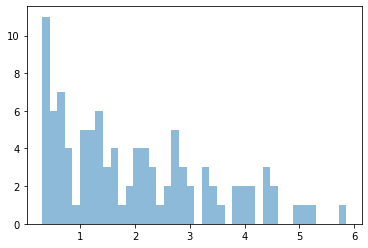

In [55]:
simfile = "/home/isaac/PIED/jupyter-notebooks/default_PIED/mammals_test2-SIMOUT.csv"
params, data = PIED.load_sims(simfile)
lambs = []
for idx, dat in data.iterrows():
    l = [x["abundance"] for x in dat]
    lambs.extend(l)
_, _, _ = plt.hist(np.log10(lambs[:100]), alpha=0.5, bins=40)
print(len(lambs))
np.mean([np.mean(x) for x in lambs])

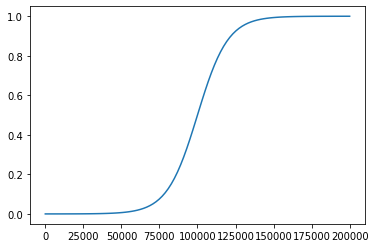

In [153]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x/10000)))

shift = 100000
x = np.linspace(-shift,shift,100)
plt.plot(x+shift, sigmoid(x))

(array([27., 37., 23.,  5.,  2.,  2.,  1.,  1.,  1.,  1.]),
 array([0.0001  , 0.000994, 0.001888, 0.002782, 0.003676, 0.00457 ,
        0.005464, 0.006358, 0.007252, 0.008146, 0.00904 ]),
 <a list of 10 Patch objects>)

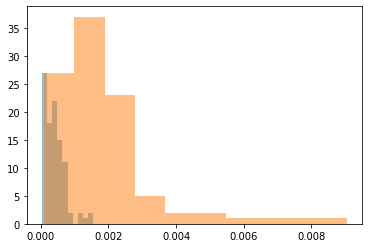

In [413]:
import msprime

def sim(gens=10000):
    p1 = 10000
    p2 = 50000
    pop1 = msprime.PopulationConfiguration(sample_size=5, initial_size=p1)
    pop2 = msprime.PopulationConfiguration(sample_size=5, initial_size=p2)
    mig = msprime.MassMigration(time=gens, source=0, dest=1)
    size = msprime.PopulationParametersChange(time=gens, initial_size=p1+p2)

    ts = msprime.simulate(Ne=1,
                            population_configurations=[pop1, pop2],
                            demographic_events=[mig, size],
                            length=10000,
                            mutation_rate=1e-8)
    pop_inds = {}
    for pop in ts.populations():
        pop_inds[pop.id] = ts.samples(pop.id)
    return ts.diversity(list(pop_inds.values()))
a, b = sim()

pi1s = []
pi2s = []
for i in range(100):
    a, b = sim(gens=2)
    pi1s.append(a)
    pi2s.append(b)

plt.hist(pi1s, alpha=0.5)
plt.hist(pi2s, alpha=0.5)

(array([21., 26., 19.,  8., 17.,  2.,  3.,  2.,  0.,  2.]),
 array([0.      , 0.000146, 0.000292, 0.000438, 0.000584, 0.00073 ,
        0.000876, 0.001022, 0.001168, 0.001314, 0.00146 ]),
 <a list of 10 Patch objects>)

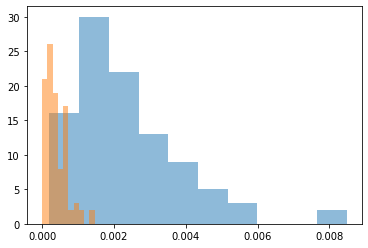

In [414]:
pi1s = []
pi2s = []
for i in range(100):
    a, b = sim(gens=2)
    pi1s.append(a)
for i in range(100):
    a, b = sim(gens=2000000)
    pi2s.append(a)

plt.hist(pi1s, alpha=0.5)
plt.hist(pi2s, alpha=0.5)

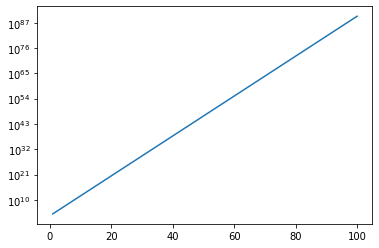

In [162]:
def growth(abund, r, dt):
    return int(abund * (np.exp(r*dt)))
growth(1000, 1, 1)
xs = np.linspace(1, 100, 100)
plt.semilogy(xs, [growth(1000, 2, x) for x in xs])

(array([ 3.,  2.,  3., 14., 17., 18., 19., 12.,  9.,  3.]),
 array([0.66652005, 0.71858607, 0.77065209, 0.82271811, 0.87478413,
        0.92685015, 0.97891617, 1.03098219, 1.08304821, 1.13511423,
        1.18718025]),
 <a list of 10 Patch objects>)

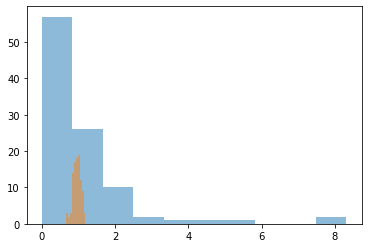

In [406]:
plt.hist(np.random.weibull(a=0.8, size=100), alpha=0.5)
#plt.hist(np.random.weibull(a=1, size=100), alpha=0.5)
plt.hist(np.random.weibull(a=10, size=100), alpha=0.5)

In [408]:
b = 3
for _ in range(10):
    dt = np.random.weibull(0.9) * (1/(len(tips) * b))
    b -= dt
    print(b)

2.9976961153349864
2.9713040184375377
2.9703357238338
2.967406951094256
2.967307872912678
2.964053643026406
2.959626561536963
2.9596202297033796
2.95434733584733
2.952970405583265


In [454]:
%%R
# Speciation integral
# l0 = lambda_0
# b = coefficient
# x = time
# z = z(t)
Lambda = function(t1,t2,l0,b,x,z) {
  z0 = z
  # if(t1>t2) {
  #     cat("t1 =", t1, "t2 =", t2, "\n") 
  #     stop("fuck")
  # }
  #insert times t1 and t2
  for (ti in c(t1,t2)) {  
    if (is.na(match(ti,x))) {
      x = c(x, ti)
      print(x)
      oa = order(x)
      x = x[oa]
      print(x)
      print(z0)
      z0 = apply(z0, 2, '[', oa)
      while (any(is.na(z0[,1]))) {
        yna = which(is.na(z0[,1]))   
        z0[yna,] = z0[yna - 1,]
      } 
    } 
  }
  f_int = which(x==t1):which(x==t2)
    dx = diff(x[f_int])
    sum(exp(z0[f_int[-length(f_int)],]%*%c(l0,b))*dx)
}
Lambda = compiler::cmpfun(Lambda)

# randomly sample waiting times
rwait = function(tstart,l0,b,x,z) {
  u = runif(1)
  f = function(t) {Lambda(tstart,t,l0,b,x,z) + log(u)}
  r = uniroot(f,c(tstart,tstart+20),extendInt='upX')
  r$root
}
rwait = compiler::cmpfun(rwait)

#Lambda(0, 1, 3, 2, 1, exp)
rwait(0, 3, 1, 10, c(0:30))


[1] 10  0
[1]  0 10
 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30


R[write to console]: Error in apply(z0, 2, "[", oa) : dim(X) must have a positive length




Error in apply(z0, 2, "[", oa) : dim(X) must have a positive length


In [3]:
import PIED
sim = PIED.Core("wat")
sim._simulate()

(<toytree.Toytree.ToyTree at 0x7f0741fea470>,
 ['1',
  'taxa',
  '20',
  '4',
  'abundance',
  'False',
  '50000',
  '0.1',
  '0',
  '0.01',
  '0.1',
  '0.1',
  '500',
  '1e-05',
  '10',
  '20',
  '4.229789004797936',
  '0.05',
  'r19:2887:0.11622222222222235:0.025003575168526814:1,r18:13669:0.7494222222222222:0.019524315713856794:1,r17:539:0.021333333333333333:0.00870456751160448:1,r16:10370:0.4040444444444429:0.008156030468082656:1,r15:6041:0.28062222222222183:0.006063926095277456:1,r14:6201:0.4408444444444427:0.006008127995033033:1,r13:3397:0.15653333333333327:-0.02797873123508597:1,r12:62:0.0008:-0.011304091503829796:1,r11:65:0.0011111111111111111:-0.010843792628729657:1,r10:18:0.0:-0.012831411532311895:1,r9:85:0.007333333333333335:-0.014961671107469517:1,r8:16:0.0:-0.010366020548363148:1,r7:555:0.02684444444444443:-0.010382861917432812:1,r6:1976:0.05431111111111104:0.00982032825933108:1,r5:19:0.0010666666666666667:-0.003477371094639636:1,r4:11:0.0:-0.009008601759411448:1,r3:13:0.0

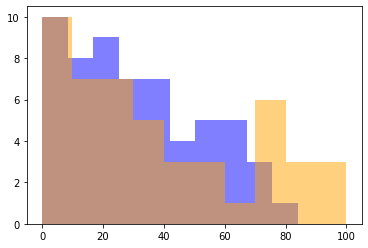

In [60]:
for c, sim in zip(["blue", "orange"], ["6", "7"]):
    params, data = PIED.util.load_sims("default_PIED/analysis{}-SIMOUT.csv".format(sim))
    rs = []
    nneg = []
    for row in data.iterrows():
        r = [x["r"] for x in row[1]]
        n = sum(np.array(r) < 0)
        nneg.append(n)
        if n > 70:
            rs.extend(r)
            #plt.hist(r, color=c, alpha=0.2)
    plt.hist(nneg, color=c, alpha=0.5)

(array([10.,  8., 10.,  7.,  7.,  3.,  0.,  1.,  1.,  1.]),
 array([0.02941176, 0.10584559, 0.18227941, 0.25871324, 0.33514706,
        0.41158088, 0.48801471, 0.56444853, 0.64088235, 0.71731618,
        0.79375   ]),
 <a list of 10 Patch objects>)

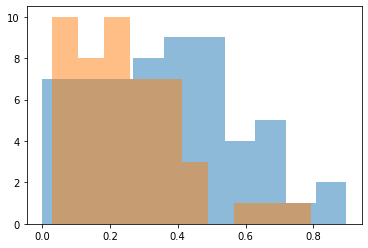

In [47]:
params, data = PIED.util.load_sims("default_PIED/analysis6-SIMOUT.csv")
plt.hist(params["turnover_rate"], alpha=0.5)
params, data = PIED.util.load_sims("default_PIED/analysis7-SIMOUT.csv")
plt.hist(params["turnover_rate"], alpha=0.5)

In [84]:
sim = PIED.Core("wat")
sim.get_params()
for p in ["None", "log", "0.7"]:
    sim.set_param("abundance_scaling", p)
    t, r = sim._simulate()
np.log(10)

2.302585092994046

In [99]:
ct = 220 + 292 + 173 + 229 + 70 + 184 + 148 + 400 + 408 - 211 - 144
9877 - ct

8108